<a href="https://colab.research.google.com/github/Shokhzod2202/AI-Application/blob/main/Week11Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests

url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get(url)

with open('utilities.py', 'w') as f:
  f.write(r.text)

In [5]:
pip install python3-utilities

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from utilities import train_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 100
BATCH_SIZE = 16

TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = '/content/book_store_sales.csv'

def readfile(file_name):
  file = open(file_name, 'r', encoding='utf-8')
  next(file)
  data = []
  for line in (file):
    values = line.split(',')
    data.append(float(values[1]))
  file.close()
  return np.array(data, dtype=np.float32)

sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]

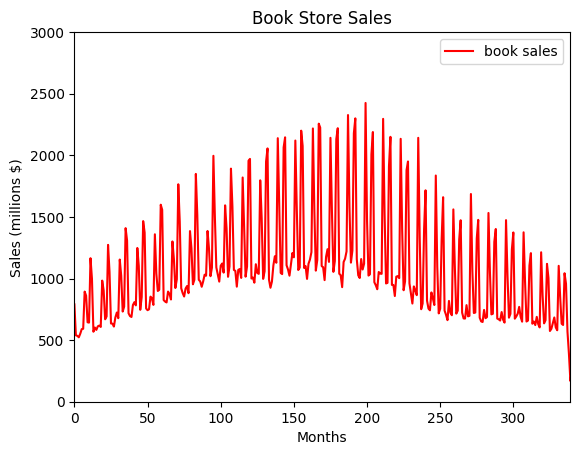

In [11]:
# Plot dataset
x = range(len(sales))
plt.plot(x, sales, 'r-', label='book sales')
plt.title('Book Store Sales')
plt.axis([0, 339, 0.0, 3000.0])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()

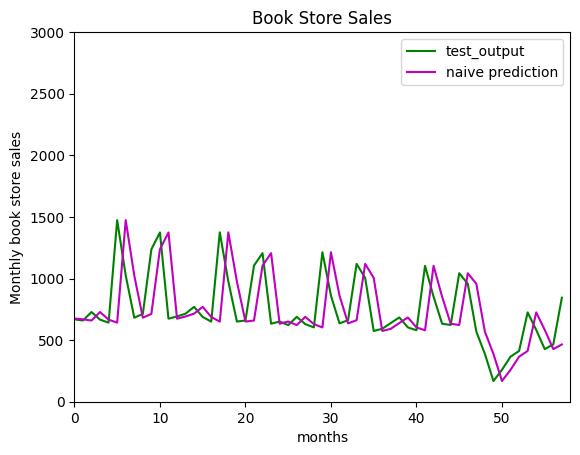

In [12]:
# Plot naive prediction
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label = 'test_output')
plt.plot(x, naive_prediction, 'm-', label = 'naive prediction')
plt.title('Book Store Sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [14]:
# Standardize train and test data.
# Use only training seasons to compute mean and stddev
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

In [19]:
#  Create trian example.

train_months = len(train_sales)
train_X = np.zeros((train_months-MIN, train_months-1, 1), dtype = np.float32)
train_Y = np.zeros((train_months-MIN, 1), dtype = np.float32)
for i in range(0, train_months-MIN):
  train_X[i, -(i+MIN):, 0] = train_sales_std[0:i+MIN]
  train_Y[i, 0] = train_sales_std[i+MIN]

# Create test example.
test_months = len(test_sales)
test_X = np.zeros((test_months-MIN, test_months-1, 1), dtype=np.float32)
test_Y = np.zeros((test_months-MIN, 1), dtype=np.float32)
for i in range(0, test_months-MIN):
  test_X[i, -(i+MIN):, 0] = test_sales_std[0:i+MIN]
  test_Y[i, 0] = test_sales_std[i+MIN]

# Create Dataset objects.
trainset = TensorDataset(torch.from_numpy(train_X).clone(), torch.from_numpy(train_Y))
testset = TensorDataset(torch.from_numpy(test_X).clone(), torch.from_numpy(test_Y))


In [20]:
'''
# Create train example

train_months = len(train_sales)
train_X = np.zeros((train_months - MIN, train_months - 1, 1), dtype=np.float32)
train_y = np.zeros((train_months - MIN, 1), dtype=np.float32)

for i in range(0, train_months - MIN):
    train_X[i, -(i + MIN):, 0] = train_sales_std[0:i + MIN]
    train_y[i, 0] = train_sales_std[i + MIN]

# Create test examples.
test_months = len(test_sales)
test_X = np.zeros((test_months - MIN, test_months - 1, 1), dtype=np.float32)  # Remove the extra comma here
test_y = np.zeros((test_months - MIN, 1), dtype=np.float32)

for i in range(0, test_months - MIN):
    test_X[i, -(i + MIN):, 0] = test_sales_std[0:i + MIN]
    test_y[i, 0] = test_sales_std[i + MIN]



  # Create Dataset objects.
trainset=TensorDataset (torch.from_numpy (train_X).clone(), torch.from_numpy(train_y))
testset=TensorDataset (torch.from_numpy(test_X).clone(), torch.from_numpy(test_y))
 '''

# Custom layer that retrieves only last time step from RNN output.
class LastTimestep(nn. Module):
  def forward(self, inputs):
    return inputs [1] [0]
# Create RNN model
model=nn.Sequential(nn.RNN (1, 128, nonlinearity='relu', batch_first=True),
                    LastTimestep(),
                    nn.Linear (128, 1))

# Loss function and optimizer.
optimizer=torch.optim.Adam(model.parameters())
loss_function = nn.MSELoss()
# Train model.

BATCH_SIZE = 32  # You can choose an appropriate batch size

# Now you can use BATCH_SIZE in your train_model function
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'mae')

Epoch 1/100 loss: 0.9902 - mae: 0.7105 - val_loss: 1.2968 - val_mae: 0.9166
Epoch 2/100 loss: 0.8593 - mae: 0.6749 - val_loss: 1.1552 - val_mae: 0.8660
Epoch 3/100 loss: 0.8573 - mae: 0.6408 - val_loss: 1.0789 - val_mae: 0.8386
Epoch 4/100 loss: 0.8188 - mae: 0.6084 - val_loss: 0.9436 - val_mae: 0.7825
Epoch 5/100 loss: 0.6407 - mae: 0.5720 - val_loss: 0.8486 - val_mae: 0.7057
Epoch 6/100 loss: 0.5519 - mae: 0.5341 - val_loss: 0.8543 - val_mae: 0.7209
Epoch 7/100 loss: 0.6744 - mae: 0.6005 - val_loss: 0.7082 - val_mae: 0.6571
Epoch 8/100 loss: 0.5823 - mae: 0.5196 - val_loss: 0.5131 - val_mae: 0.5634
Epoch 9/100 loss: 0.5622 - mae: 0.5090 - val_loss: 0.4830 - val_mae: 0.5426
Epoch 10/100 loss: 0.4989 - mae: 0.4864 - val_loss: 0.3991 - val_mae: 0.4564
Epoch 11/100 loss: 0.5004 - mae: 0.4592 - val_loss: 0.4101 - val_mae: 0.4321
Epoch 12/100 loss: 0.4715 - mae: 0.4645 - val_loss: 0.2445 - val_mae: 0.3260
Epoch 13/100 loss: 0.4362 - mae: 0.4415 - val_loss: 0.2405 - val_mae: 0.3024
Epoch 14

[0.10212499234411451, 0.15520461648702621]

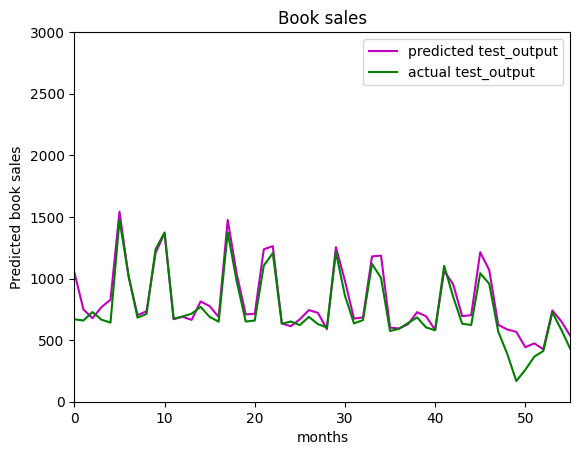

In [24]:
# Use trained model to predict the test data

inputs = torch.from_numpy(test_X)
inputs = inputs.to(device)
outputs = model(inputs)
predicted_test = outputs.cpu().detach().numpy()

# De-standardize output

predicted_test = np.reshape(predicted_test,(len(predicted_test)))
predicted_test = predicted_test * stddev + mean

# Plot test prediction
x = range(len(test_sales)-MIN)
plt.plot(x, predicted_test, 'm-', label='predicted test_output')
plt.plot(x, test_sales[-(len(test_sales)-MIN):], 'g-', label ='actual test_output')
plt.title('Book sales')
plt.axis([0, 55, 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()